作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)

## 导入依赖

In [1]:
import numpy as np
import cv2
import open3d as o3d
import mediapipe as mp
from matplotlib import pyplot as plt

# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.open3d import *

%matplotlib inline

pybullet build time: Jun  3 2022 02:05:55


## 摄像头初始化

In [2]:
# 创建相机对象
camera = Gemini335()

astra配置文件夹路径: ../astra-config/config/
初始化视频流:  color
UVC 相机设备号: 0
检测到产品型号为: Astra Pro
初始化UVC视频流


## 创建人体关键点检测模型

In [3]:
# 创建人体关键点检测模型
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## 采集图像

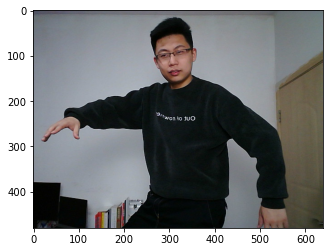

In [31]:
# 采集图像
# 注: 前几帧图像质量不好，可以多采集几次  
# 另外确保画面中有手
img_bgr = camera.read_color_img()
# 为了获取正确的左右手判断，将图像镜像
img_bgr = cv2.flip(img_bgr, 1)

# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

In [32]:
cv2.imwrite("pose.png", img_bgr)

True

## 人体关键点检测

In [33]:
# 为了提高性能， 将图像标记为只读模式
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb.flags.writeable = False
# 人体关键点检测
results = pose.process(img_rgb)

In [34]:
if results.pose_landmarks is None:
    print("没有检测到人体")

In [35]:
print(results.pose_landmarks.landmark)

[x: 0.47592687606811523
y: 0.23924320936203003
z: -0.5460406541824341
visibility: 0.9999966621398926
, x: 0.492241770029068
y: 0.19759488105773926
z: -0.5285784602165222
visibility: 0.9999953508377075
, x: 0.5059271454811096
y: 0.19423770904541016
z: -0.5285876393318176
visibility: 0.9999964237213135
, x: 0.5154926180839539
y: 0.19174933433532715
z: -0.5288550853729248
visibility: 0.9999964237213135
, x: 0.45856285095214844
y: 0.2059037685394287
z: -0.4995836615562439
visibility: 0.9999934434890747
, x: 0.4488460421562195
y: 0.209242045879364
z: -0.49923378229141235
visibility: 0.9999932050704956
, x: 0.4413985311985016
y: 0.21248936653137207
z: -0.49922865629196167
visibility: 0.9999897480010986
, x: 0.5404526591300964
y: 0.20132988691329956
z: -0.32521191239356995
visibility: 0.9999986886978149
, x: 0.4427242875099182
y: 0.22716814279556274
z: -0.19091056287288666
visibility: 0.9999926090240479
, x: 0.5067284107208252
y: 0.2716204524040222
z: -0.4688869118690491
visibility: 0.9999990

In [36]:
landmark = results.pose_landmarks.landmark
print(f"关键点个数: {len(landmark)}")

关键点个数: 33


## 绘制人体的关键点

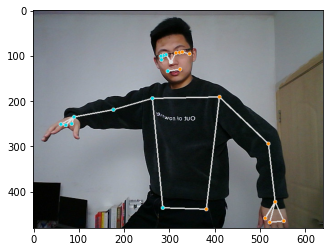

In [37]:
canvas = np.copy(img_bgr)
# 创建绘图工具
mp_drawing = mp.solutions.drawing_utils
# 创建绘图风格
mp_drawing_styles = mp.solutions.drawing_styles

mp_drawing.draw_landmarks(
        canvas,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

plt.imshow(canvas[:, :, ::-1])

In [38]:
cv2.imwrite("canvas.png", canvas)

True